### 调试超参数 观察训练结果

In [2]:

# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [3]:

# 定义超参数
epochs = 20
BATCH_SIZE = 128

In [4]:

# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())

d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [5]:

trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [6]:

def train_iter(epochs, model, trian_dl, lr):
    train_hist = []

    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        # 提取训练数据
        for data, target in trian_dl:
            # 前向运算
            output = model(data.reshape(-1, 784))
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()  # 所有参数梯度清零
            loss.backward()     # 计算梯度（参数.grad）
            optimizer.step()    # 更新参数

        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_hist.append(loss.item())

    return train_hist

In [7]:

import matplotlib.pyplot as plt

def draw_train_hist(hist_list):
    for i,hist in enumerate(hist_list):   
        plt.plot(hist, label=f'Loss{i}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [8]:

# 测试
def test_acc(test_dl, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
            total += target.size(0)  # size(0) 等效 shape[0]
            correct += (predicted == target).sum().item()
    return correct/total*100

In [9]:

models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])

In [10]:

train_hists = [
    train_iter(epochs, model, trian_dl, lr=lr) 
       for model, lr in zip(models, [0.01, 0.001, 0.0001])]

Epoch:0 Loss: 1.756665587425232
Epoch:1 Loss: 1.0375133752822876
Epoch:2 Loss: 0.8639671802520752
Epoch:3 Loss: 0.5317537188529968
Epoch:4 Loss: 0.676120936870575
Epoch:5 Loss: 0.8015413284301758
Epoch:6 Loss: 0.5742047429084778
Epoch:7 Loss: 0.566008985042572
Epoch:8 Loss: 0.5202472805976868
Epoch:9 Loss: 0.4089541435241699
Epoch:10 Loss: 0.3784566819667816
Epoch:11 Loss: 0.42011284828186035
Epoch:12 Loss: 0.3106180429458618
Epoch:13 Loss: 0.2904338538646698
Epoch:14 Loss: 0.433398574590683
Epoch:15 Loss: 0.3236818015575409
Epoch:16 Loss: 0.4731709063053131
Epoch:17 Loss: 0.28115949034690857
Epoch:18 Loss: 0.38693225383758545
Epoch:19 Loss: 0.1970391869544983
Epoch:0 Loss: 2.2888972759246826
Epoch:1 Loss: 2.261089563369751
Epoch:2 Loss: 2.2488014698028564
Epoch:3 Loss: 2.2249643802642822
Epoch:4 Loss: 2.196906328201294
Epoch:5 Loss: 2.129368543624878
Epoch:6 Loss: 2.1106510162353516
Epoch:7 Loss: 2.008469820022583
Epoch:8 Loss: 2.0048282146453857
Epoch:9 Loss: 1.8811553716659546
Epoch

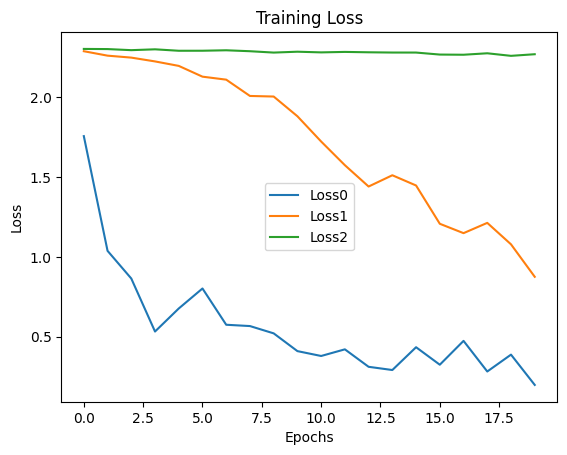

In [11]:

draw_train_hist(train_hists)

In [12]:

for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Model1 Acc: 80.12
Model2 Acc: 56.28999999999999
Model3 Acc: 28.17


### 观察不同batch_size 训练结果


In [13]:

models = torch.nn.ModuleList([
    nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)) for _ in range(3)
])

In [14]:

train_datas = [
    DataLoader(train_data, batch_size=bs, shuffle=True) 
        for bs in [128 ,256, 512]]

train_hists = [train_iter(epochs, model, dl, lr=0.01) 
        for model, dl in zip(models, train_datas)]

Epoch:0 Loss: 1.8547587394714355
Epoch:1 Loss: 1.0515971183776855
Epoch:2 Loss: 0.7766868472099304
Epoch:3 Loss: 0.6856672763824463
Epoch:4 Loss: 0.6595293879508972
Epoch:5 Loss: 0.6926074028015137
Epoch:6 Loss: 0.5560612082481384
Epoch:7 Loss: 0.6981532573699951
Epoch:8 Loss: 0.24037885665893555
Epoch:9 Loss: 0.4882635772228241
Epoch:10 Loss: 0.6097884774208069
Epoch:11 Loss: 0.3685643672943115
Epoch:12 Loss: 0.31825852394104004
Epoch:13 Loss: 0.3814949691295624
Epoch:14 Loss: 0.4477168321609497
Epoch:15 Loss: 0.3935122787952423
Epoch:16 Loss: 0.2558451294898987
Epoch:17 Loss: 0.4480697214603424
Epoch:18 Loss: 0.30654069781303406
Epoch:19 Loss: 0.37850192189216614
Epoch:0 Loss: 2.188105821609497
Epoch:1 Loss: 1.8096169233322144
Epoch:2 Loss: 1.254898190498352
Epoch:3 Loss: 1.073118805885315
Epoch:4 Loss: 0.659262478351593
Epoch:5 Loss: 0.7410420775413513
Epoch:6 Loss: 0.6456806063652039
Epoch:7 Loss: 0.7397698760032654
Epoch:8 Loss: 0.8060649037361145
Epoch:9 Loss: 0.6438305974006653


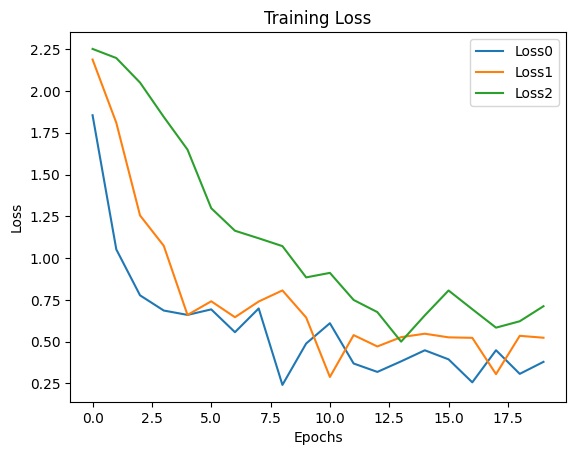

In [15]:
draw_train_hist(train_hists)


In [16]:

for i in range(len(models)):
    print(f'Model{i+1} Acc:', test_acc(test_dl, models[i]))
    torch.save(models[i].state_dict(), f'model{i+1}.pth')

Model1 Acc: 80.84
Model2 Acc: 74.35000000000001
Model3 Acc: 68.08
